In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting data
import seaborn as sns #statistical data visualization
import matplotlib as mpl

%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv


# Reading dataset

In [2]:
df = pd.read_csv('/kaggle/input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv')
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio
0,Andaman and Nicobar,7646,6,7511,129,0.08,98.23,1.69
1,Andhra Pradesh,2062781,5398,2043050,14333,0.26,99.04,0.69
2,Arunachal Pradesh,55075,141,54654,280,0.26,99.24,0.51
3,Assam,608126,3866,598296,5964,0.64,98.38,0.98
4,Bihar,726045,30,716354,9661,0.00,98.67,1.33


# Dataset datatypes information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


# Summery statistics

In [4]:
df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,9.488767e+05,4825.777778,9.314479e+05,12603.000000,0.528333,98.199444,1.271944
std,1.415959e+06,14210.413174,1.384148e+06,24086.614398,1.370455,1.324225,0.566290
min,7.646000e+03,0.000000,7.511000e+03,4.000000,0.000000,91.400000,0.040000
25%,8.409925e+04,94.750000,8.287850e+04,819.000000,0.035000,97.792500,0.962500
50%,4.753625e+05,237.500000,4.643130e+05,5549.500000,0.260000,98.415000,1.315000
75%,1.013730e+06,3890.250000,1.000266e+06,13762.250000,0.517500,98.770000,1.582500
max,6.599850e+06,81490.000000,6.432138e+06,139965.000000,8.260000,99.930000,2.750000


# Active cases per state

Active cases per states:


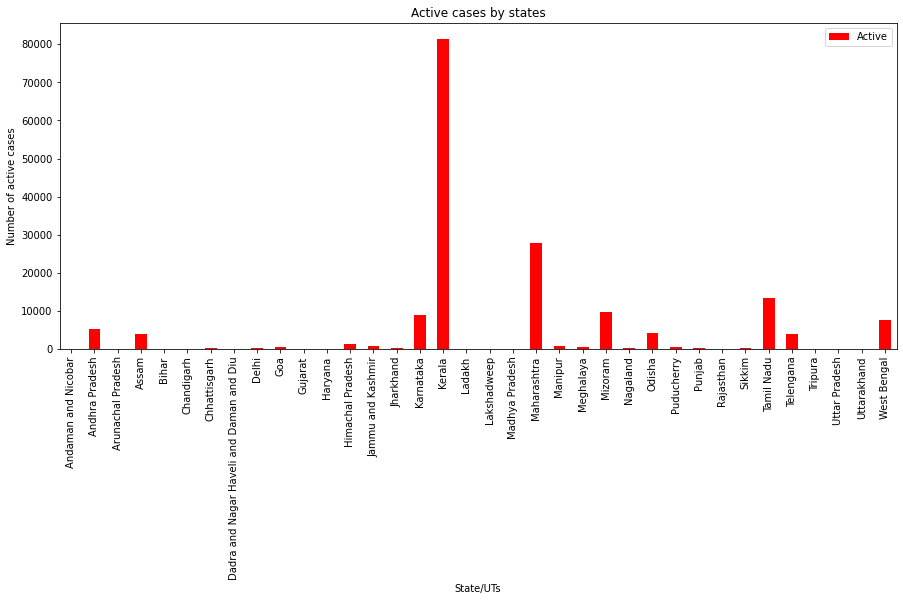

In [5]:
df.plot(kind='bar', x='State/UTs', y='Active',color="red", figsize=(15,6),
        title="Active cases by states", ylabel="Number of active cases")
print("Active cases per states:")

# Active vs Deaths

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

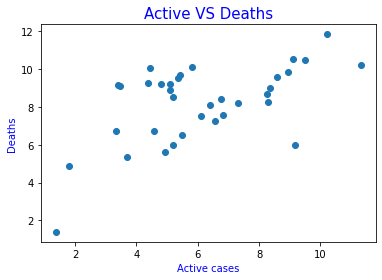

In [6]:
plt.scatter(np.log(df['Active']), np.log(df['Deaths']), marker='o')
plt.title("Active VS Deaths", fontdict={'size':15,'color':'blue'})
plt.xlabel("Active cases",fontdict={'size':10,'color':'blue'})
plt.ylabel("Deaths",fontdict={'size':10,'color':'blue'})
mpl.rc('figure',figsize=(10,5))
plt.show

# Corelation among each attributes

In [7]:
df.corr()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio
Total Cases,1.000000,0.733464,0.999984,0.888910,-0.010576,-0.018757,0.068464
Active,0.733464,1.000000,0.732616,0.427430,0.233191,-0.167239,-0.173296
Discharged,0.999984,0.732616,1.000000,0.887550,-0.012186,-0.016457,0.066971
Deaths,0.888910,0.427430,0.887550,1.000000,-0.058993,-0.058295,0.278432
Active Ratio,-0.010576,0.233191,-0.012186,-0.058993,1.000000,-0.911862,-0.287722
Discharge Ratio,-0.018757,-0.167239,-0.016457,-0.058295,-0.911862,1.000000,-0.130763
Death Ratio,0.068464,-0.173296,0.066971,0.278432,-0.287722,-0.130763,1.000000


# Total cases vs Discharged

<function matplotlib.pyplot.show(close=None, block=None)>

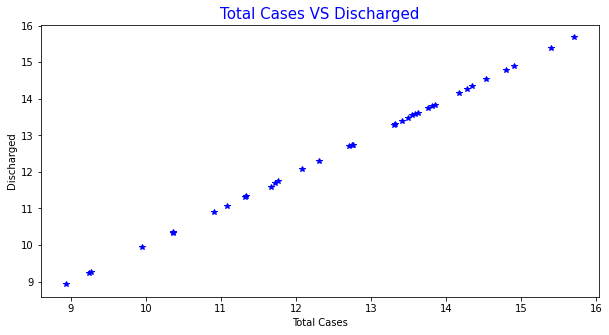

In [8]:
plt.plot(np.log(df['Total Cases']), np.log(df['Discharged']), 'b*')
plt.title("Total Cases VS Discharged",fontdict={'size':15,'color':'blue'})
plt.xlabel("Total Cases")
plt.ylabel("Discharged")
plt.show

# Total cases vs Deaths

<function matplotlib.pyplot.show(close=None, block=None)>

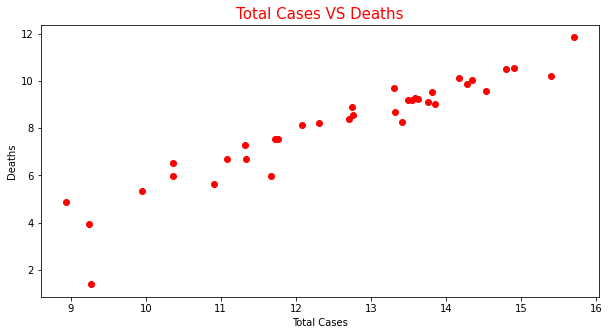

In [9]:
plt.plot(np.log(df['Total Cases']), np.log(df['Deaths']), 'ro')
plt.title("Total Cases VS Deaths",fontdict={'size':15,'color':'red'})
plt.xlabel("Total Cases")
plt.ylabel("Deaths")
plt.show

# Total cases vs Active

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

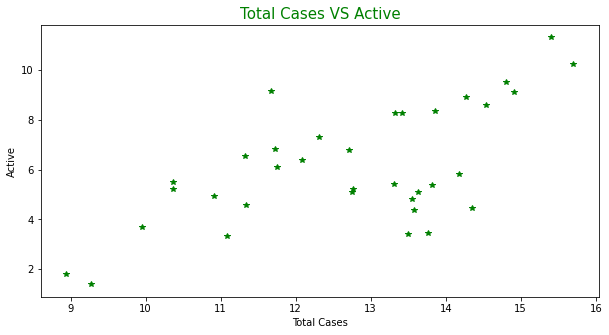

In [10]:
plt.plot(np.log(df['Total Cases']), np.log(df['Active']), 'g*')
plt.title("Total Cases VS Active",fontdict={'size':15,'color':'green'})
plt.xlabel("Total Cases")
plt.ylabel("Active")
plt.show

# Distribution of total cases

[   7646 2062781   55075  608126  726045   65320 1005799   10679 1439526
  177819  826378  771133  222312  331494  348562 2985227 4897884   20896
   10365  792729 6599850  123107   83269  116689   31689 1037523  127621
  602163  954396   31842 2692949  669932   84376 1710069  343799 1584492]


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

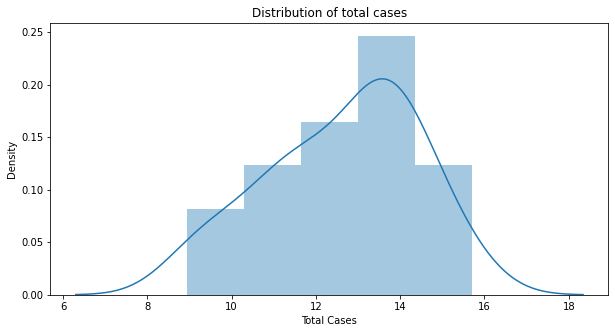

In [11]:
total_cases= np.array(df['Total Cases'])
print(total_cases)

sns.distplot(np.log(df['Total Cases']), kde=True)
plt.title("Distribution of total cases")
plt.show

# Comparisons of total cases with active, discharged and deaths

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

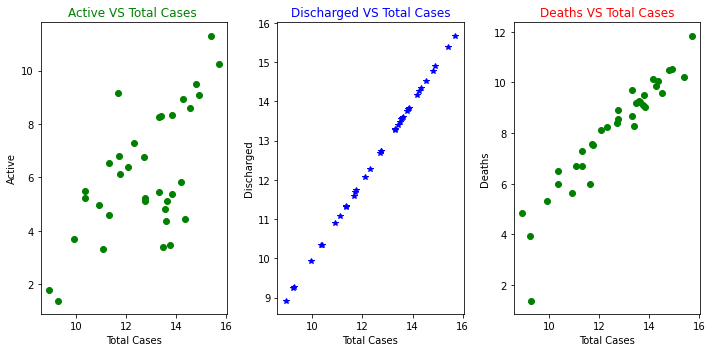

In [12]:
plt.subplot(1,3,1)
plt.plot(np.log(df['Total Cases']), np.log(df['Active']), 'go')
plt.title("Active VS Total Cases ",fontdict={'size':12,'color':'green'})
plt.xlabel("Total Cases")
plt.ylabel("Active")

plt.subplot(1,3,2)
plt.plot(np.log(df['Total Cases']), np.log(df['Discharged']), 'b*')
plt.title("Discharged VS Total Cases",fontdict={'size':12,'color':'blue'})
plt.xlabel("Total Cases")
plt.ylabel("Discharged")

plt.subplot(1,3,3)
plt.plot(np.log(df['Total Cases']), np.log(df['Deaths']), 'go')
plt.title("Deaths VS Total Cases",fontdict={'size':12,'color':'red'})
plt.xlabel("Total Cases")
plt.ylabel("Deaths")

plt.tight_layout()
plt.show

# Total cases per state

[ 8.94193791 14.53956563 10.91645117 13.31813738 13.49536728 11.08705355
 13.82129281  9.27603448 14.17982445 12.08852146 13.62480757 13.55561614
 12.31183708 12.71136499 12.7615714  14.90918635 15.40431383  9.94731303
  9.24619002 13.5832367  15.70255748 11.72080917 11.32983161 11.66726756
 10.3637249  13.8523467  11.75682021 13.30828345 13.76883396 10.36854145
 14.80614743 13.41493149 11.34303828 14.35204428 12.74781246 14.27577441]
total cases per state as of 16th october 2021:


<bound method Figure.show of <Figure size 720x1440 with 1 Axes>>

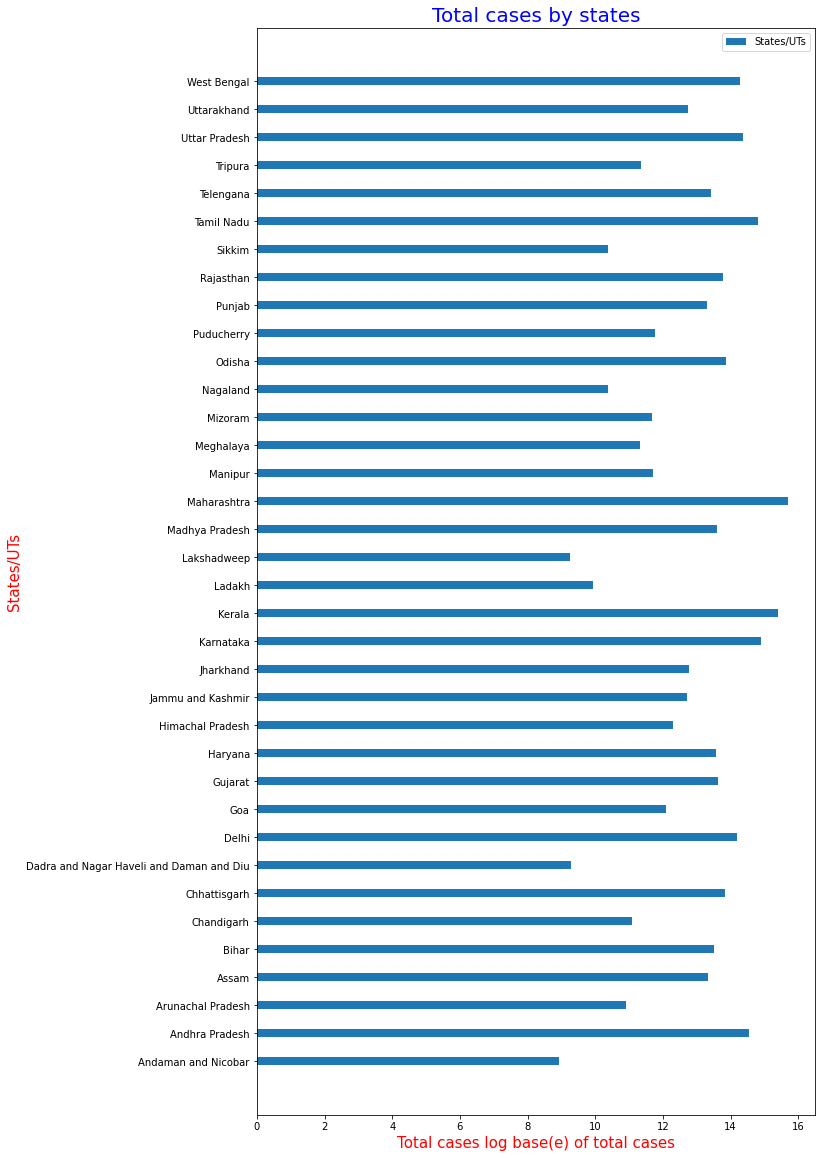

In [13]:
ylabel= np.array(df['State/UTs'])

xpoints = np.array(np.log(df['Total Cases']))
print(xpoints)
print("total cases per state as of 16th october 2021:")

fig, ax = plt.subplots()

ax.barh(ylabel,xpoints, label='States/UTs', height=0.3)
ax.set_title("Total cases by states",fontdict={'size':20,'color':'blue'})
ax.set_xlabel("Total cases log base(e) of total cases",fontdict={'size':15,'color':'red'})
ax.set_ylabel("States/UTs",fontdict={'size':15,'color':'red'})
ax.legend(loc='upper right')

fig.set_size_inches(10,20)
fig.show

# Active, Discharged and Death cases portion

total cases: 34159562
Actice cases:  173728
Discharged cases:  33532126
total deaths:  453708
[  173728 33532126   453708]


<function matplotlib.pyplot.show(close=None, block=None)>

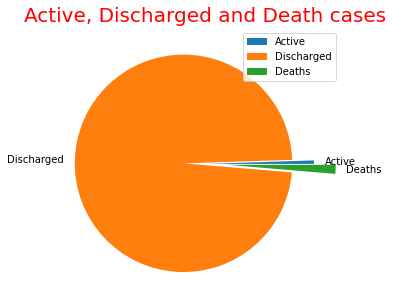

In [14]:
tc = np.sum(df['Total Cases'])
print("total cases:",tc)
ac = np.sum(df['Active'])
print("Actice cases: ", ac)
dc = np.sum(df['Discharged'])
print("Discharged cases: ", dc)
deaths = np.sum(df['Deaths'])
print("total deaths: ", deaths)

piec = np.array([ac, dc, deaths])
lebels= ["Active","Discharged", "Deaths"]
myexplode=[0,0.2,0.2]
print(piec)

plt.pie(piec, labels=lebels, explode=myexplode)
plt.title("Active, Discharged and Death cases",fontdict={'size':20,'color':'red'})
plt.legend()
plt.show

# Most number of deaths among all states

States with most number of deaths:  states
Maharashtra    139965
Karnataka       37995
Tamil Nadu      35987
Kerala          27765
Delhi           25091
Name: deaths, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

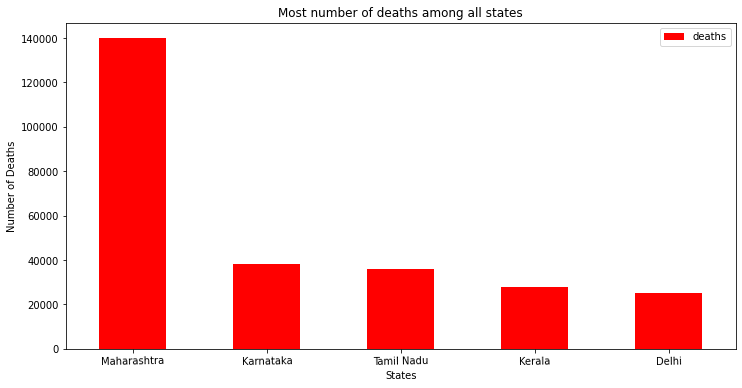

In [15]:
states = np.array(df['State/UTs'])
deaths = np.array(df['Deaths'])

ndf = pd.DataFrame({'states':states,
                    'deaths':deaths})

resetidx = ndf.set_index('states')
sorteddf = resetidx.deaths.sort_values(ascending=False).head()
print("States with most number of deaths: ",sorteddf)

sorteddf.plot(kind='bar', x='states', y='deaths',
             title='Most number of deaths among all states',
             figsize=(12,6),
             legend=True,
             xlabel="States",
             ylabel="Number of Deaths",
             fontsize=10,
             color="red",
             rot=1)
plt.show

# Most number of active cases among all states

statea with most active cases:
 Kerala         81490
Maharashtra    27747
Tamil Nadu     13531
Mizoram         9636
Karnataka       8920
Name: active, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

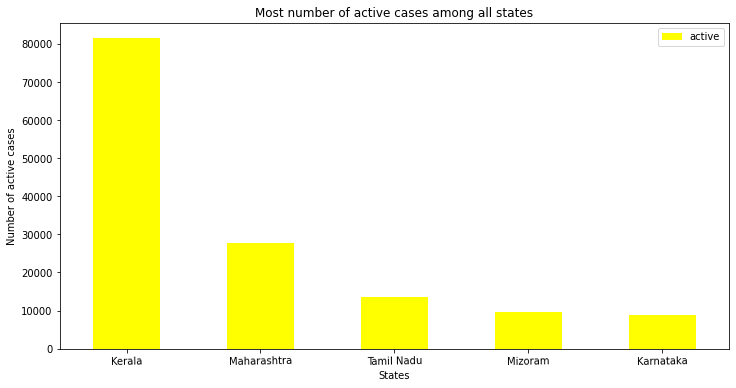

In [16]:
states = np.array(df['State/UTs'])
active = np.array(df['Active'])

ndf2 = pd.DataFrame({'states':states,
                     'active':active}, index=states)

sorted2= ndf2.active.sort_values(ascending=False).head()
print("statea with most active cases:\n",sorted2)

sorted2.plot.bar(title="Most number of active cases among all states",
                ylabel="Number of active cases",
                xlabel="States",
                figsize=(12,6),
                color="yellow",
                rot=1,
                legend=True,
                fontsize=10
                )
plt.show

# Ratio of deaths per state

[169.  69.  51.  98. 133. 126. 135.   4. 174. 189. 122. 130. 168. 134.
 147. 127.  57. 100.  49. 133. 212. 155. 173.  34. 214.  80. 145. 275.
  94. 123. 134.  59.  97. 134. 215. 120.]


<bound method Figure.show of <Figure size 720x432 with 1 Axes>>

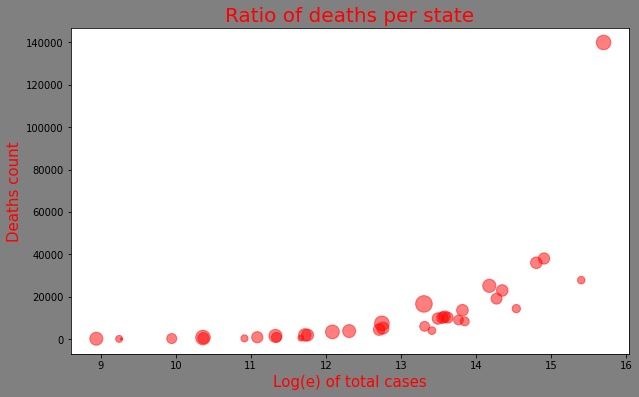

In [17]:
totalcases = np.array(np.log(df['Total Cases']))
deaths = np.array(df['Deaths'])
dratio = np.array(df['Death Ratio'])*100
print(dratio)

fig, ax=plt.subplots()

ax.scatter(totalcases,deaths, s=dratio, c='red', alpha=0.5)
ax.set_xlabel("Log(e) of total cases",fontdict={'size':15,'color':'red'})
ax.set_ylabel("Deaths count",fontdict={'size':15,'color':'red'})
ax.set_title("Ratio of deaths per state",fontdict={'size':20,'color':'red'})

fig.patch.set_facecolor("grey")
fig.set_size_inches(10,6)
fig.show

# Least number of discharged cases among each state

least number of discharged cases among each state:  Andaman and Nicobar                          7511
Lakshadweep                                 10314
Dadra and Nagar Haveli and Daman and Diu    10671
Ladakh                                      20648
Nagaland                                    30766
Name: discharged, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

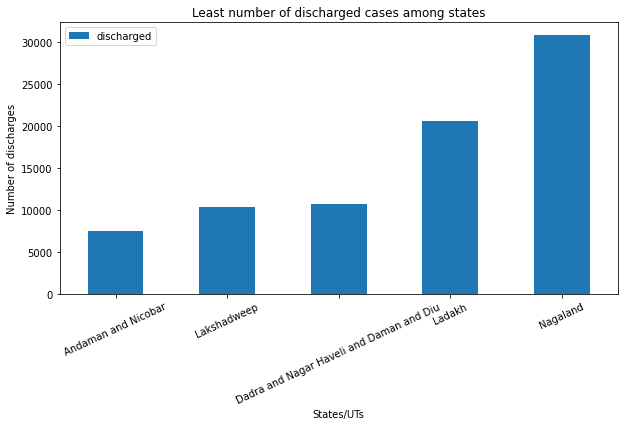

In [18]:
discharged = np.array(df['Discharged'])
states = np.array(df['State/UTs'])

ddf = pd.DataFrame({'discharged':discharged,
                     'states':states}, index = states)

sortddf = ddf.discharged.sort_values(ascending=True).head()
print("least number of discharged cases among each state: ",sortddf)

sortddf.plot.bar(title="Least number of discharged cases among states",
               xlabel="States/UTs",
               ylabel="Number of discharges",
               rot=25,
               fontsize=10,
               legend=True)

plt.show

# States with highest active,death and discharge case ratios

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator


<bound method Figure.show of <Figure size 1152x576 with 3 Axes>>

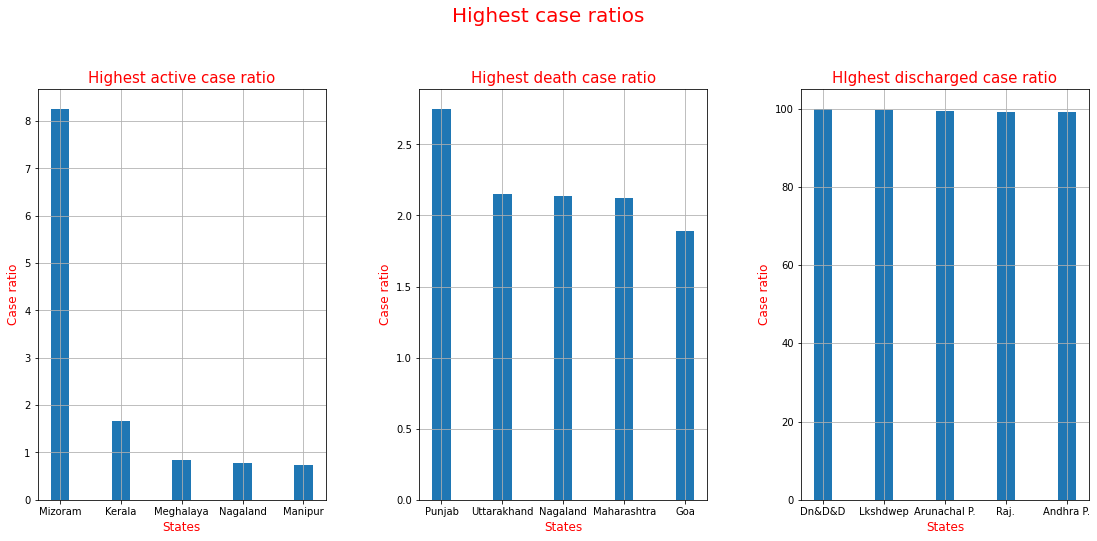

In [19]:
states= np.array(df['State/UTs'])
ar = np.array(df['Active Ratio'])
deathr = np.array(df['Death Ratio'])
disr = np.array(df['Discharge Ratio'])

ratiodf = pd.DataFrame({'active':ar,
                       'deaths':deathr,
                       'discharge':disr}, index=states)

ratiodf.active.sort_values(ascending=False).head()
x1 =np.array(ratiodf.active.sort_values(ascending=False).head().index)
y1 =np.array(ratiodf.active.sort_values(ascending=False).head())


ratiodf.deaths.sort_values(ascending=False).head()
x2 =np.array(ratiodf.deaths.sort_values(ascending=False).head().index)
y2 =np.array(ratiodf.deaths.sort_values(ascending=False).head())


ratiodf.discharge.sort_values(ascending=False).head()
x3 =np.array(ratiodf.discharge.sort_values(ascending=False).head().index)
y3 =np.array(ratiodf.discharge.sort_values(ascending=False).head())
x3ticklabel = ['Dn&D&D','Lkshdwep','Arunachal P.','Raj.','Andhra P.']

fig, (ax0,ax1,ax2) =plt.subplots(1,3)

ax0.bar(x1,y1, width=0.3)
ax0.set_title("Highest active case ratio",fontdict={'size':15,'color':'red'})
ax0.set_xlabel("States",fontdict={'size':12,'color':'red'})
ax0.set_ylabel("Case ratio",fontdict={'size':12,'color':'red'})
ax0.grid()

ax1.bar(x2,y2,width=0.3)
ax1.set_title("Highest death case ratio",fontdict={'size':15,'color':'red'})
ax1.set_xlabel("States",fontdict={'size':12,'color':'red'})
ax1.set_ylabel("Case ratio",fontdict={'size':12,'color':'red'})
ax1.grid()

ax2.bar(x3,y3,width=0.3)
ax2.set_title("HIghest discharged case ratio",fontdict={'size':15,'color':'red'})
ax2.set_xlabel("States",fontdict={'size':12,'color':'red'})
ax2.set_ylabel("Case ratio",fontdict={'size':12,'color':'red'})
ax2.set_xticklabels(x3ticklabel)
ax2.grid()

plt.suptitle("Highest case ratios",fontdict={'color':'red'}, fontsize=20)
fig.tight_layout()
fig.set_size_inches(16,8)
fig.show

**Thank you for visiting this notebook and if you have liked above visuals! do upvote this notebook and if any feedback and suggestions, kindly comment down in comment section!**